In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/accident data.csv', sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/accident data.csv'

In [ ]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05.06.2019,51.506.187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02.07.2019,51.495.029,Daylight,Kensington and Chelsea,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26.08.2019,51.517.715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16.08.2019,51.495.478,Daylight,Kensington and Chelsea,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03.09.2019,51.488.576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,20074100F4608,Slight,03.07.2019,51.819.822,Daylight,St. Albans,-0.342639,1.0,1.0,Wet or damp,Single carriageway,Urban,Fine no high winds,Car
111247,20074100F4609,Slight,03.07.2019,51.809.096,Daylight,St. Albans,-0.353622,1.0,2.0,Wet or damp,Single carriageway,Rural,Other,Car
111248,20074100F4610,Slight,22.06.2019,51.750.721,Darkness - lights lit,St. Albans,-0.339665,1.0,1.0,Dry,Single carriageway,Urban,Fine no high winds,Car
111249,20074100F4611,Slight,28.06.2019,51.721.299,Daylight,St. Albans,-0.364052,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car


In [ ]:
df.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,176


In [ ]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
Slight,94867
Serious,14853
Fatal,1531


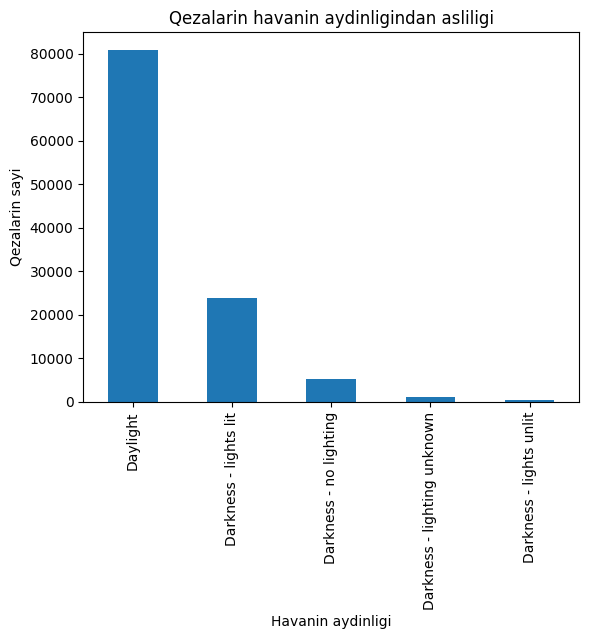

In [ ]:
#Havanin aydinligina gore analiz
fig, ax = plt.subplots()
df['Light_Conditions'].value_counts().plot(kind = 'bar', ax=ax)
ax.set_title("Qezalarin havanin aydinligindan asliligi")
ax.set_xlabel("Havanin aydinligi")
ax.set_ylabel("Qezalarin sayi")
plt.show()

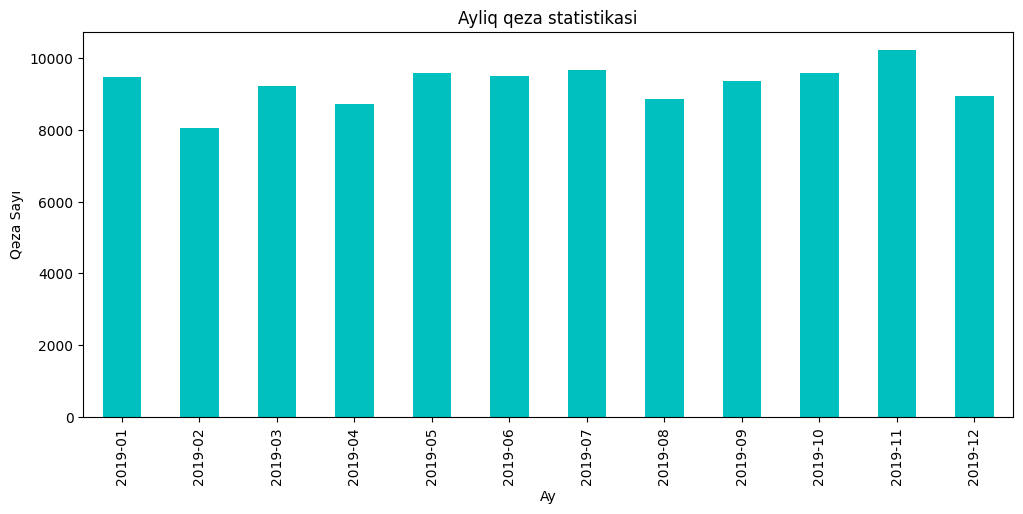

In [ ]:
# Aylıq qezalarin analizi
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d.%m.%Y')
df['year_month'] = df['Accident Date'].dt.to_period('M')
df_monthly = df.groupby(df['year_month']).size()

plt.figure(figsize=(12, 5))
df_monthly.plot(kind='bar', color='c')
plt.xlabel("Ay")
plt.ylabel("Qəza Sayı")
plt.title("Ayliq qeza statistikasi")
plt.show()

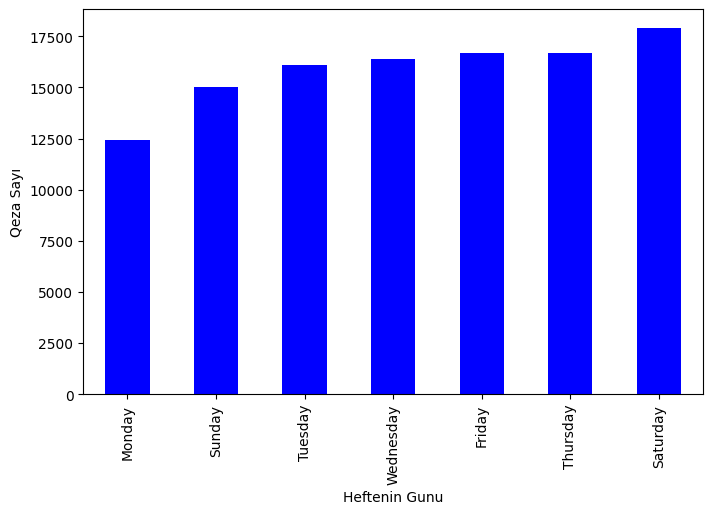

In [ ]:
#Heftelik qezalarin analizi
df['week_day'] = df['Accident Date'].dt.day_name()
df_weekday = df.groupby('week_day').size()
plt.figure(figsize=(8, 5))
df_weekday.sort_values().plot(kind='bar', color='b')
plt.xlabel("Heftenin Gunu")
plt.ylabel("Qeza Sayı")
plt.show()

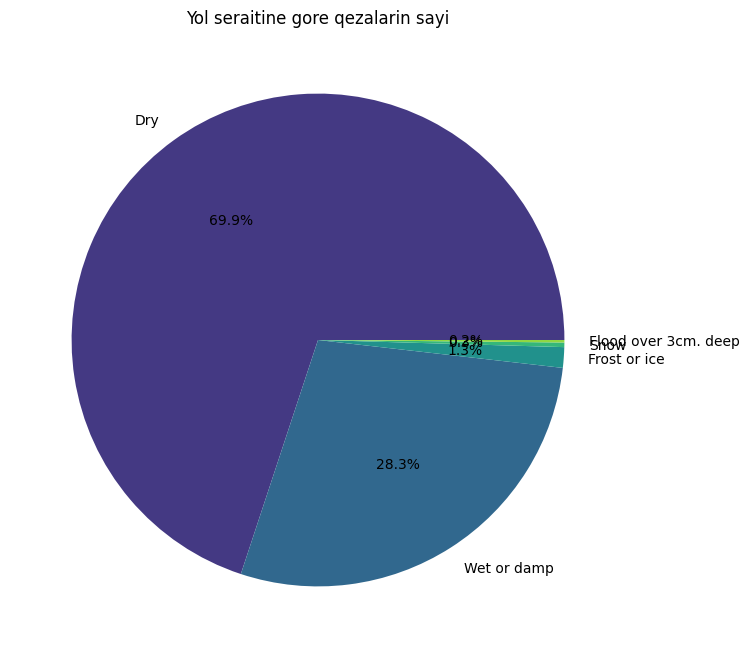

In [ ]:
vehicle_counts = df['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(vehicle_counts)))
plt.title("Yol seraitine gore qezalarin sayi")
plt.show()

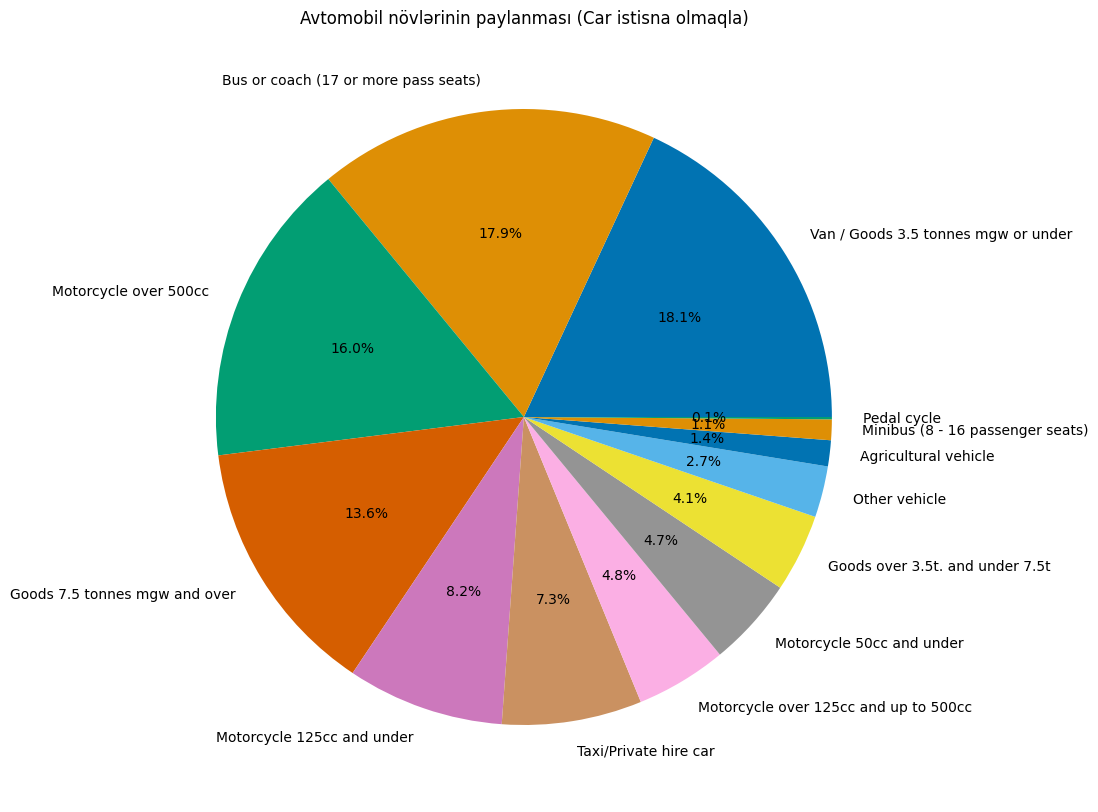

In [ ]:
filtered_df = df[df['Vehicle_Type'] != 'Car']
vehicle_counts = filtered_df['Vehicle_Type'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', colors=sns.color_palette("colorblind", len(vehicle_counts)))
plt.title("Avtomobil növlərinin paylanması (Car istisna olmaqla)")
plt.show()